In [3]:
import pandas as pd
import numpy as np
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
nltk.download('punkt')
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
from sklearn.manifold import TSNE
import mplcursors
%matplotlib widget
from sentence_transformers import SentenceTransformer
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package punkt to /home/a2211506/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
acl_full_text = pd.read_parquet('acl_corpus_full-text.parquet')

In [5]:
acl_full_text

,acl_id,title,abstract,full_text
0,O02-2002,A Study on Word Similarity using Context Vecto...,There is a need to measure word similarity whe...,There is a need to measure word similarity whe...
1,L02-1310,,,
2,R13-1042,"Headerless, Quoteless, but not Hopeless? Using...",Thread disentanglement is the task of separati...,Thread disentanglement is the task of separati...
3,W05-0819,Aligning words in English-Hindi parallel corpora,"In this paper, we describe a word alignment al...","In this paper, we describe a word alignment al..."
4,L02-1309,,,
...,...,...,...,...
80008,P99-1056,The grapho-phonological system of written Fren...,The processes through which readers evoke ment...,The processes through which readers evoke ment...
80009,P99-1051,Acquiring Lexical Generalizations from Corpora...,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...
80010,P99-1000,Using Aggregation for Selecting Content when G...,"As co-chairs, we had two particular objectives...","As co-chairs, we had two particular objectives..."
80011,P99-1,,,


In [6]:
acl_full_text

,acl_id,title,abstract,full_text
0,O02-2002,A Study on Word Similarity using Context Vecto...,There is a need to measure word similarity whe...,There is a need to measure word similarity whe...
1,L02-1310,,,
2,R13-1042,"Headerless, Quoteless, but not Hopeless? Using...",Thread disentanglement is the task of separati...,Thread disentanglement is the task of separati...
3,W05-0819,Aligning words in English-Hindi parallel corpora,"In this paper, we describe a word alignment al...","In this paper, we describe a word alignment al..."
4,L02-1309,,,
...,...,...,...,...
80008,P99-1056,The grapho-phonological system of written Fren...,The processes through which readers evoke ment...,The processes through which readers evoke ment...
80009,P99-1051,Acquiring Lexical Generalizations from Corpora...,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...
80010,P99-1000,Using Aggregation for Selecting Content when G...,"As co-chairs, we had two particular objectives...","As co-chairs, we had two particular objectives..."
80011,P99-1,,,


# Comparison between 90's to 20's

In [7]:
acl_full_text
acl_full_text.insert(1, 'year', 0)
acl_full_text.insert(2, 'era_id', 0)

In [8]:
for index, row in acl_full_text.iterrows():
    if(int(row[0][1]) == 0 or int(row[0][1]) == 1 or int(row[0][1]) == 2):
        year = int(f'20{row[0][1:3]}')
        era_id = 20
    else:
        year = int(f'19{row[0][1:3]}')
        era_id = 19
    acl_full_text.iat[index, 1] = year
    acl_full_text.iat[index, 2] = era_id

In [9]:
origin_data = acl_full_text[acl_full_text['acl_id'].str.startswith('P')]
origin_data

,acl_id,year,era_id,title,abstract,full_text
55,P07-1084,2007,20,"Bilingual Terminology Mining -Using Brain, not...",Current research in text mining favours the qu...,Current research in text mining favours the qu...
75,P12-3005,2012,20,langid.py: An Off-the-shelf Language Identific...,"We present langid.py, an off-the-shelf languag...","We present langid.py, an off-the-shelf languag..."
76,P12-3016,2012,20,ACCURAT Toolkit for Multi-Level Alignment and ...,The lack of parallel corpora and linguistic re...,The lack of parallel corpora and linguistic re...
78,P13-1068,2013,20,Large tagset labeling using Feed Forward Neura...,Standard methods for part-of-speech tagging su...,Standard methods for part-of-speech tagging su...
80,P19-1161,2019,20,Counterfactual Data Augmentation for Mitigatin...,Gender stereotypes are manifest in most of the...,Gender stereotypes are manifest in most of the...
...,...,...,...,...,...,...
80008,P99-1056,1999,19,The grapho-phonological system of written Fren...,The processes through which readers evoke ment...,The processes through which readers evoke ment...
80009,P99-1051,1999,19,Acquiring Lexical Generalizations from Corpora...,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...
80010,P99-1000,1999,19,Using Aggregation for Selecting Content when G...,"As co-chairs, we had two particular objectives...","As co-chairs, we had two particular objectives..."
80011,P99-1,1999,19,,,


In [10]:
docs = origin_data.iloc[:]["abstract"]

In [11]:
model = SentenceTransformer('all-MiniLM-L6-v2') 
sentences = list(docs)
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [12]:
data = [[(i)] + list(embeddings[i]) for i in range(len(docs))]
column_names = ["type"]+["x_"+str(dim) for dim in range(len(embeddings[0]))]
out = pd.DataFrame(data, columns=column_names)
# out = out.sort_values(["type"])
out.to_csv("anthology2022.csv", index=None)
out.insert(1, 'year', origin_data['year'].values)
out.insert(2, 'title', origin_data['title'].values)
out.insert(3, 'era_id', origin_data['era_id'].values)
out

,type,year,title,era_id,x_0,x_1,x_2,x_3,x_4,x_5,...,x_374,x_375,x_376,x_377,x_378,x_379,x_380,x_381,x_382,x_383
0,0,2007,"Bilingual Terminology Mining -Using Brain, not...",20,0.018361,-0.069289,-0.045787,-0.043936,-0.018778,-0.021305,...,0.034927,0.087479,0.006538,0.018238,0.010428,0.004054,0.034271,0.006479,0.102239,-0.011539
1,1,2012,langid.py: An Off-the-shelf Language Identific...,20,-0.105661,-0.071641,0.016773,0.029877,0.055789,0.004766,...,0.031761,-0.009294,-0.067167,-0.002346,0.067897,0.026724,-0.035206,0.074351,0.032862,0.036407
2,2,2012,ACCURAT Toolkit for Multi-Level Alignment and ...,20,-0.035305,0.002230,-0.027929,-0.065353,-0.033240,-0.010883,...,-0.018830,0.054944,-0.051018,-0.008120,0.091906,0.000924,-0.009921,-0.073989,0.058452,-0.002942
3,3,2013,Large tagset labeling using Feed Forward Neura...,20,-0.053140,-0.046510,0.060817,0.003574,-0.023673,-0.035749,...,-0.013833,0.046963,-0.008109,-0.038660,0.006526,0.051414,0.055248,0.082104,0.011507,0.023412
4,4,2019,Counterfactual Data Augmentation for Mitigatin...,20,0.045053,0.051824,0.097364,0.006804,-0.012303,-0.034496,...,0.017489,-0.026561,-0.073428,0.044345,-0.005372,0.094221,0.085115,0.072723,0.025918,-0.102300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6843,6843,1999,The grapho-phonological system of written Fren...,19,0.008246,-0.060258,0.026317,-0.046699,-0.074417,0.036662,...,0.050305,-0.023778,-0.001076,0.043697,-0.003842,0.000818,0.008940,0.064710,-0.008511,-0.080687
6844,6844,1999,Acquiring Lexical Generalizations from Corpora...,19,0.037969,-0.074707,0.098113,0.012809,-0.000898,-0.016804,...,0.036504,0.056846,-0.042679,-0.013597,0.019778,0.020553,0.036398,0.002618,0.045448,-0.045846
6845,6845,1999,Using Aggregation for Selecting Content when G...,19,-0.050357,0.010708,-0.037823,0.015405,0.047308,0.030114,...,0.072255,0.113188,-0.046559,-0.028938,-0.014051,0.018255,0.047413,0.031819,-0.069908,0.041277
6846,6846,1999,,19,-0.118838,0.048299,-0.002548,-0.011011,0.051951,0.010292,...,0.107304,0.011428,0.013367,-0.012747,0.061454,0.035641,0.158746,0.126409,0.046549,-0.015717


In [13]:
# sampling
SAMPLING_RATE = 0.1
sampled_out = out.sample(n=(int(len(out)*SAMPLING_RATE)), random_state=1)
title_list = out['title'].values
X = sampled_out.iloc[:, 4:]
pca = PCA(n_components=2)
pca.fit(X)
x_pcx = pca.transform(X)
x_pcx.shape

(684, 2)

In [14]:
year_list = list(sampled_out['era_id'].values)
mapped_year_list = year_list

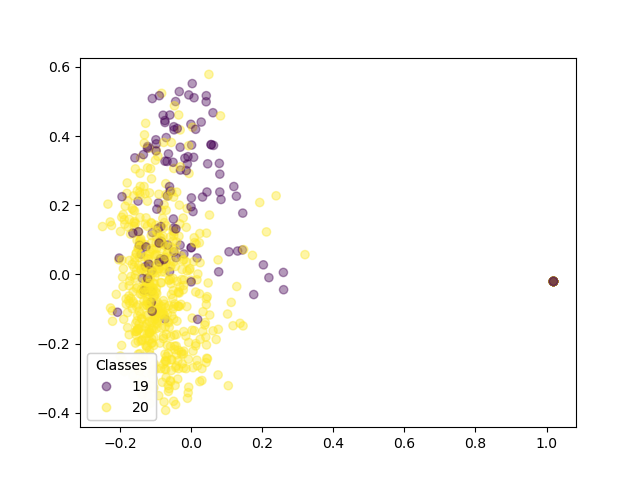

In [15]:
fig, ax = plt.subplots()
sc = ax.scatter(x_pcx[:, 0], x_pcx[:, 1], c=mapped_year_list,  alpha=0.4)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

cursor = mplcursors.cursor(sc, hover=True)
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text=title_list[sel.target.index])
plt.show()

# 2000年と２０１９年の比較

In [38]:
df1 = out[(out['year'] == 2000)].sample(n=80)
# df2 = out[(out['year'] == 2005)].sample(n=80)
df3 = out[(out['year'] == 2010)].sample(n=80)
# df4 = out[(out['year'] == 2010)].sample(n=80)
df5 = out[(out['year'] == 2019)].sample(n=80)
out = pd.concat([df1, df3, df5], axis=0) # df2, df3, df4,

# SAMPLING_RATE = 1.0
# sampled_out = out.sample(n=(int(len(out)*SAMPLING_RATE)), random_state=1)
sampled_out = out
title_list = out['title'].values
X = sampled_out.iloc[:, 4:]
pca = PCA(n_components=2)
pca.fit(X)
x_pcx = pca.transform(X)
x_pcx.shape

(240, 2)

In [39]:
pcx_2000_2010_2019 =  pd.DataFrame(data=x_pcx, columns=['x1', 'x2'])

In [40]:
pcx_2000_2010_2019.insert(0, 'title', out['title'].values)
pcx_2000_2010_2019.insert(1, 'lab_or_not', 'notlab')
pcx_2000_2010_2019.insert(2, 'award', 'normal')
pcx_2000_2010_2019.insert(3, 'year', out['year'].values)

In [41]:
year_list = list(sampled_out['year'].values)
mapped_year_list = year_list

In [42]:
import plotly.express as px

pcx_2000_2010_2019["year"] = pcx_2000_2010_2019["year"].astype(str) # change a legend color to Discrete form Continuous Color
fig = px.scatter(pcx_2000_2010_2019, x="x1", y="x2", color='year', hover_data=[pcx_2000_2010_2019['title'].values])
# fig.update_traces(marker=dict(size=12,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                               opacity=0.5,
#                   selector=dict(mode='markers'))
fig.show()

fig.update_layout(title=f"Comparison of 2000, 2015 and 2019 ACL papers(SBERT)")
fig.write_html(f"Comparison_2000_2010_2015_2000(SBERT).html")

1. 年代を細切れにする(2000と2022)  
2. センテンスBERTを用いる  
PCAだけでよい  
2. タイトルを入力として、異なるマークで表示する。
3. 年代ごとに色をプロットする(虹色に出力？？)
4. タイトルからドットを探す。(ベストアワード)  
5. Kernel PCA  

# Best Pape 2019

In [97]:
out_2019 = out[(out['year'] == 2019)]
out_2019

,type,year,title,era_id,x_0,x_1,x_2,x_3,x_4,x_5,...,x_374,x_375,x_376,x_377,x_378,x_379,x_380,x_381,x_382,x_383
4,4,2019,Counterfactual Data Augmentation for Mitigatin...,20,0.045053,0.051824,0.097364,0.006804,-0.012303,-0.034496,...,0.017489,-0.026561,-0.073428,0.044345,-0.005372,0.094221,0.085115,0.072723,0.025918,-0.102300
7,7,2019,Unsupervised Discovery of Gendered Language th...,20,0.055325,-0.026664,0.026544,0.035051,-0.025747,0.028869,...,0.042687,-0.009107,-0.044295,0.062166,0.015808,0.011218,0.014497,0.052990,0.027738,-0.078972
197,197,2019,Margin-based Parallel Corpus Mining with Multi...,20,-0.043548,-0.073220,-0.017195,-0.006280,0.074463,0.062449,...,0.020356,0.067960,-0.048375,-0.060403,0.074845,0.020359,0.031584,-0.009068,-0.054869,0.029275
214,214,2019,Searching for Effective Neural Extractive Summ...,20,-0.087911,-0.016023,0.083686,0.014348,0.102073,0.052615,...,-0.022277,0.001834,0.037592,-0.062821,0.059469,0.020610,-0.007068,0.078916,-0.054624,-0.012028
216,216,2019,Style Transformer: Unpaired Text Style Transfe...,20,-0.090578,-0.026025,0.070133,0.055996,0.007759,0.059559,...,0.018578,0.012675,0.015493,0.084550,0.030756,0.020959,-0.017649,0.082438,0.026562,-0.056312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,6806,2019,Gender Stereotypes Differ between Male and Fem...,20,0.046365,0.002689,0.039982,0.063683,-0.007623,-0.039271,...,0.016852,-0.021938,-0.065961,0.065509,0.014462,0.008181,0.118501,0.013749,0.004447,-0.097342
6809,6809,2019,Natural Language Generation: Recently Learned ...,20,-0.034928,-0.045406,0.002385,0.063168,-0.065263,0.067551,...,0.077954,0.003297,0.036508,0.023411,0.079902,-0.005770,0.033541,0.121778,0.062387,0.002115
6827,6827,2019,Towards Turkish Abstract Meaning Representation,20,0.035353,0.065390,0.082225,0.001338,-0.001349,0.011120,...,0.123215,0.043724,0.031627,0.040976,0.042600,-0.017804,0.082463,0.089982,0.016809,-0.049283
6830,6830,2019,Predicting the Outcome of Deliberative Democra...,20,-0.004017,-0.119011,0.006992,0.003682,0.042108,-0.002981,...,0.057444,0.069133,-0.005857,0.003294,0.040088,0.074956,0.047436,0.075340,-0.021177,-0.023391


In [98]:
title_list = out_2019['title'].values
X = out_2019.iloc[:, 4:]
pca = PCA(n_components=2)
pca.fit(X)
x_pcx = pca.transform(X)
x_pcx.shape

(771, 2)

In [99]:
pcx_2019 =  pd.DataFrame(data=x_pcx, columns=['x1', 'x2'])

In [100]:
pcx_2019.insert(0, 'title', out[out['year'] == 2019]['title'].values)
pcx_2019.insert(1, 'award', 'normal')
pcx_2019.insert(2, 'lab_or_not', 'notlab')

In [101]:
pcx_2019

,title,award,lab_or_not,x1,x2
0,Counterfactual Data Augmentation for Mitigatin...,normal,notlab,0.139320,-0.332231
1,Unsupervised Discovery of Gendered Language th...,normal,notlab,0.259766,-0.252265
2,Margin-based Parallel Corpus Mining with Multi...,normal,notlab,-0.200357,-0.276789
3,Searching for Effective Neural Extractive Summ...,normal,notlab,-0.053926,0.118149
4,Style Transformer: Unpaired Text Style Transfe...,normal,notlab,-0.157265,0.012633
...,...,...,...,...,...
766,Gender Stereotypes Differ between Male and Fem...,normal,notlab,0.330665,-0.273892
767,Natural Language Generation: Recently Learned ...,normal,notlab,0.100572,0.037505
768,Towards Turkish Abstract Meaning Representation,normal,notlab,0.063818,-0.124650
769,Predicting the Outcome of Deliberative Democra...,normal,notlab,0.268620,0.004020


In [102]:
best_paper_awards = ['OpenKiwi: An Open Source Framework for Quality Estimation',
'Emotion-Cause Pair Extraction: A New Task to Emotion Analysis in Texts.',
'A Simple Theoretical Model of Importance for Summarization',
'Transferable Multi-Domain State Generator for Task-Oriented Dialogue Systems',
'We need to talk about standard splits',
'Zero-shot Word Sense Disambiguation using Sense Definition Embeddings',
'Do you know that Florence is packed with visitors? Evaluating state-of-the-art models of speaker commitment.',
'Bridging the Gap between Training and Inference for Neural Machine Translation.',
]

In [103]:
for index, row in pcx_2019.iterrows():
    if (row['title'] in best_paper_awards):
        pcx_2019.iat[index, 1] = 'award'

pcx_2019[pcx_2019['award'] == 'award']

,title,award,lab_or_not,x1,x2
169,OpenKiwi: An Open Source Framework for Quality...,award,notlab,-0.157024,-0.108714
223,Zero-shot Word Sense Disambiguation using Sens...,award,notlab,-0.074405,-0.123166
375,Transferable Multi-Domain State Generator for ...,award,notlab,-0.043103,0.301454
543,A Simple Theoretical Model of Importance for S...,award,notlab,0.117569,0.083681
581,We need to talk about standard splits,award,notlab,0.124279,-0.065244


In [104]:
import plotly.express as px
fig = px.scatter(pcx_2019, x="x1", y="x2", color="award", hover_data=[pcx_2019['title'].values])
fig.show()
fig.update_layout(title=f"Best Paper in 2019")
fig.write_html(f"BestPaper_2019(SBERT).html")

# 乾研究室の論文を可視化

In [105]:
award_inui_lab = ['An Empirical Study of Span Representations in Argumentation Structure Parsing']

In [106]:
for index, row in pcx_2019.iterrows():
    if (row['title'] in award_inui_lab):
        pcx_2019.iat[index, 2] = 'inuilab'

pcx_2019[pcx_2019['lab_or_not'] == 'inuilab']

,title,award,lab_or_not,x1,x2
55,An Empirical Study of Span Representations in ...,normal,inuilab,0.069993,0.01051


In [109]:
import plotly.express as px
fig = px.scatter(pcx_2019, x="x1", y="x2", color="lab_or_not", hover_data=[pcx_2019['title'].values])
fig.show()
fig.update_layout(title=f"LabPaper(2019)")
fig.write_html(f"LabPaper(2019).html")